# 03/17/2025

impove the code by suggestion: show the PWV raise with perssure goes down/height goes up

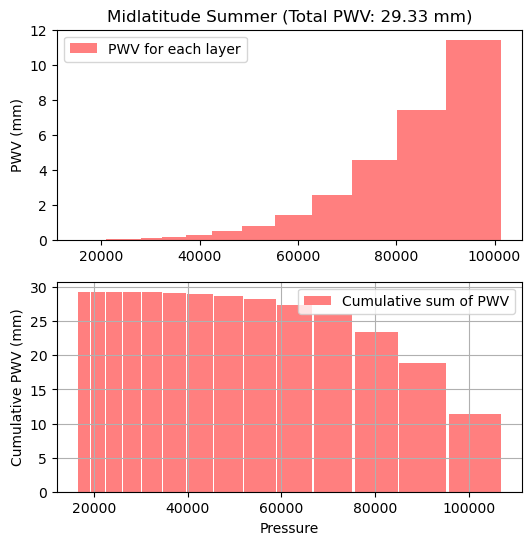

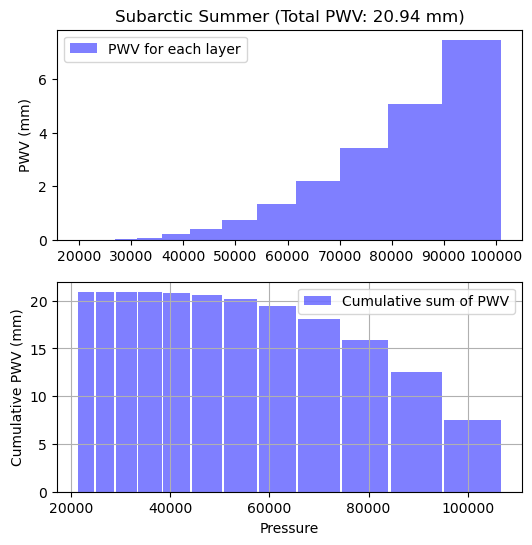

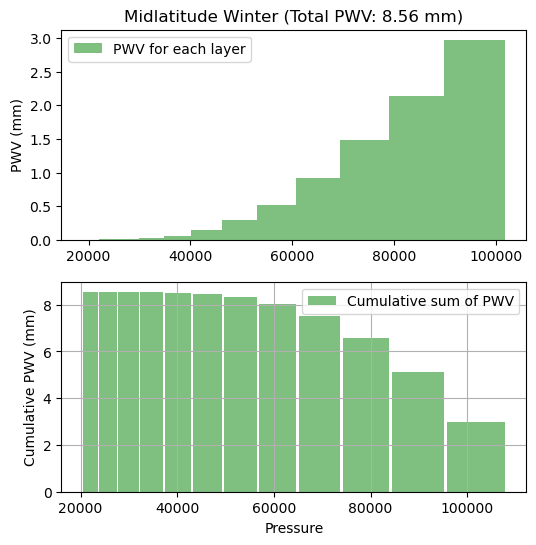

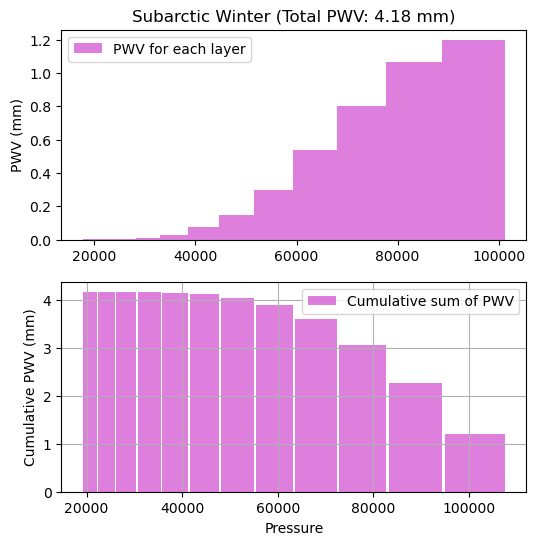

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from pyrtlib.climatology import AtmosphericProfiles as atmp
from pyrtlib.utils import ppmv2gkg, mr2rh
from pyrtlib.tb_spectrum import TbCloudRTE

def PWV_array(rho,g,m_mix_kgkg,p_pa):
    """
    Calculate the precipitable water vapor from the mixing ratio.

    input:
        rho_w in kg/m^3
        g in m/s^2
        mass mixing ratio of water vapor in kg/kg
        pressure in Pa
        
    output:
        PWV(numpy.ndarray) in mm

    """
    PWV_arr = np.zeros(len(p_pa)-1)
    PWV_sum = 0
    
    for i in range(len(p_pa) - 1):
        sum_m_P_rho = 0.5 * (m_mix_kgkg[i+1] + m_mix_kgkg[i]) * np.abs(p_pa[i+1] - p_pa[i])
        #Use Trapezoidal rule
        PWV_meter = sum_m_P_rho / (g*rho) # in m
        PWV_arr[i] = PWV_meter * 1000 # convert to mm
        PWV_sum += PWV_arr[i]

    return PWV_arr, PWV_sum

def PWVCumuSum(PWV_arr):

    """
    Calculate the cumulative sum of the precipitable water vapor.

    input:
        PWV_arr in mm

    output:
        PWV_sum in mm

    """
    PWV_lay_sum = np.zeros(len(PWV_arr))
    PWV_lay_sum[0] = PWV_arr[0]

    for i in range(1,len(PWV_arr)):
        PWV_lay_sum[i] = PWV_arr[i] + PWV_lay_sum[i-1]

    return PWV_lay_sum

atms = [atmp.MIDLATITUDE_SUMMER, atmp.SUBARCTIC_SUMMER, atmp.MIDLATITUDE_WINTER, atmp.SUBARCTIC_WINTER]
#atms = [atmp.MIDLATITUDE_SUMMER]
g = 9.8 # m/s^2
colors = ['r', 'b', 'g', 'm']
cnt = 0
row = 0
col = 0

#fig1, ax1 = plt.subplots(2, 1, figsize=(10, 10)) 

#genrated by AI(DeepSeek)

for atm in atms:
    fig0, ax0 = plt.subplots(2, 1, figsize=(6, 6))
    
    
    z, p, _, t, md = atmp.gl_atm(atm)
    md_H2O = md[:, atmp.H2O]
    p_pa = p * 1e2  # Convert to Pa

    # Calculate the pressure midpoints

    pa_mid = (p_pa[:-1] + p_pa[1:]) / 2  # Midpoints between pressure layers
    z_mid = (z[:-1] + z[1:]) / 2  # Midpoints between altitude layers
    
    m_mix_gkg = ppmv2gkg(md_H2O, atmp.H2O)
    m_mix_kgkg = m_mix_gkg * 1e-3

    rho_w_liq = 1000  # kg/m³
    PWV_arr, PWV_sum = PWV_array(rho_w_liq, g, m_mix_kgkg, p_pa)
    PWV_sum = np.round(PWV_sum, 2)

    PWV_cumu_sum = PWVCumuSum(PWV_arr)
    
    
    for i in range(len(PWV_arr)):
        
        dp = np.abs(p_pa[i] - p_pa[i+1])
        
        if PWV_arr[i] > 1e-3:

            ax0[0].bar(pa_mid[i], PWV_arr[i], width=dp, color=colors[cnt], alpha=0.5)  
            ax0[1].bar(pa_mid[i], PWV_cumu_sum[i], width=dp, align='edge', color=colors[cnt], alpha=0.5)
            
        else:
            continue


    ax0[0].set_ylabel('PWV (mm)')
    ax0[1].set_ylabel('Cumulative PWV (mm)')

    plt.xlabel("Pressure")
    # and Altitude Midpoints

    ax0[0].set_title(f"{atmp.atm_profiles()[atm]} (Total PWV: {PWV_sum} mm)")
    ax0[0].legend([f"PWV for each layer"])
    ax0[1].legend([f"Cumulative sum of PWV"])
    plt.grid(True)
    plt.show()
    cnt += 1

plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
pressure_pa = np.array([1e5, 8e4, 6e4, 4e4, 2e4])  # Primary x-axis (Pa)
altitude_km = np.array([0, 2, 4, 6, 8])             # Secondary x-axis (km)
y = [1, 2, 3, 2, 1]

fig, ax1 = plt.subplots()

# Primary x-axis (bottom)
ax1.set_xlabel("Pressure (Pa)", color="blue")
ax1.plot(pressure_pa, y, color="blue")
ax1.tick_params(axis='x', labelcolor="blue")

# Secondary x-axis (top)
ax2 = ax1.twiny()
ax2.set_xlabel("Altitude (km)", color="red")
ax2.set_xlim(ax1.get_xlim())  # Match x-limits of primary axis
ax2.set_xticks(pressure_pa)   # Align secondary ticks with primary
ax2.set_xticklabels(altitude_km)  # Map pressure to altitude labels
ax2.tick_params(axis='x', labelcolor="red")

plt.show()
